$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge 01 | Dataset de Diabetes}$$

_Profesor: Jesus Alvarado_

_Alumnos:_ 

_Maurcio Camino Quintanilla_ 

_Sandra Mozombite Shishco_

_Joel Bocanegra Uceda_

_Sophia Escalante_



# Importar y limpiar datos

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
!wget -O 'diabetes_raw.csv' 'https://drive.google.com/uc?export=download&id=1Y9ItXB8lF8ovNEE8HM1QtI0bAS-BQq2O'
dDB0 = pd.read_csv('diabetes_raw.csv')
#dDB0 = pd.read_csv("/content/diabetesCorregidoconEd_challenge_cl2.csv")
dDB0.head(3)

--2023-04-05 01:32:14--  https://drive.google.com/uc?export=download&id=1Y9ItXB8lF8ovNEE8HM1QtI0bAS-BQq2O
Resolving drive.google.com (drive.google.com)... 173.194.192.138, 173.194.192.100, 173.194.192.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.192.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/maoics9qiol1qbb817d44u6vcq94ofd8/1680658275000/14483713370229440838/*/1Y9ItXB8lF8ovNEE8HM1QtI0bAS-BQq2O?e=download&uuid=37d2d3dd-b9a1-4d04-9862-033a7c1f1cfb [following]
--2023-04-05 01:32:14--  https://doc-04-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/maoics9qiol1qbb817d44u6vcq94ofd8/1680658275000/14483713370229440838/*/1Y9ItXB8lF8ovNEE8HM1QtI0bAS-BQq2O?e=download&uuid=37d2d3dd-b9a1-4d04-9862-033a7c1f1cfb
Resolving doc-04-8g-docs.googleusercontent.com (doc-04-8g-docs.googleusercontent.com)... 74.125.69.132, 26

,AGE,SEX,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,Progression
0,59,2,32.1,101.0,157,93.2,38,4.0,4.8598,87.0,151
1,48,1,21.6,87.0,183,103.2,70,3.0,3.8918,69.0,75
2,72,2,30.5,93.0,156,93.6,41,4.0,4.6728,85.0,141


In [ ]:
dDB0.shape

(442, 11)

In [ ]:
dDB0['AGE'].values

array([ 59,  48,  72,  24,  50,  23,  36,  66,  60,  29,  22,  56,  53,
        50,  61,  34,  47,  68,  38,  41,  35,  25,  25,  61,  31,  30,
        19,  42,  63,  67,  32,  42,  58,  57, 200,  62,  52,  46,  48,
        48,  50,  21,  32,  54,  61,  56,  33,  27,  67,  37,  58,  65,
        34,  46,  35,  37,  37,  41,  60,  66,  29,  37,  41,  39,  67,
        36,  46,  60,  59,  53,  48,  48,  66,  52,  52,  46,  40,  22,
        50,  20,  68,  52,  44,  38,  49,  61,  29,  61,  34,  36,  52,
        61,  43,  35,  27,  29,  64,  41,  49,  48,  53,  53,  23,  65,
        41,  55,  22,  56,  54,  59,  60,  54,  25,  54,  55,  40,  62,
        65,  33,  53,  35,  66,  62,  50,  47,  47,  24,  58,  34,  51,
        31,  22,  53,  37,  28,  47,  23,  50,  58,  55,  60,  41,  60,
        40,  57,  37,  40,  33,  32,  35,  55,  49,  39,  60,  67,  41,
        44,  48,  45,  47,  46,  36,  34,  53,  61,  37,  33,  68,  49,
        48,  55,  43,  60,  31,  53,  67,  61,  62,  60,  42,  3

In [ ]:
list(dDB0.columns)

['AGE',
 'SEX',
 'BMI',
 'BP',
 'TC',
 'LDL',
 'HDL',
 'TCH',
 'LTG',
 'GLU',
 'Progression']

In [ ]:
for k in range(11):
  print('\n'+list(dDB0.columns)[k]+' = ', np.sort(dDB0[list(dDB0.columns)[k]].unique()))


AGE =  [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  79 200]

SEX =  [1 2]

BMI =  [18.  18.1 18.5 18.6 18.8 18.9 19.  19.2 19.3 19.4 19.5 19.6 19.7 19.8
 19.9 20.  20.1 20.2 20.3 20.4 20.5 20.6 20.7 20.8 20.9 21.  21.1 21.2
 21.3 21.4 21.5 21.6 21.7 21.8 21.9 22.  22.1 22.2 22.3 22.4 22.5 22.6
 22.7 22.8 22.9 23.  23.1 23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9 24.
 24.1 24.2 24.3 24.4 24.5 24.6 24.7 24.8 24.9 25.  25.1 25.2 25.3 25.4
 25.5 25.6 25.7 25.8 25.9 26.  26.1 26.2 26.3 26.4 26.5 26.6 26.7 26.8
 26.9 27.  27.2 27.3 27.4 27.5 27.7 27.8 27.9 28.  28.1 28.2 28.3 28.4
 28.5 28.6 28.7 28.8 28.9 29.  29.2 29.3 29.4 29.5 29.6 29.7 29.8 29.9
 30.  30.1 30.2 30.3 30.4 30.5 30.6 30.7 30.8 31.  31.2 31.3 31.4 31.5
 31.6 31.8 31.9 32.  32.1 32.3 32.4 32.6 32.7 32.8 32.9 33.  33.1 33.2
 33.3 33.5 33.6 33.8

In [ ]:
dDB0['AGE'] = np.where(dDB0['AGE']>120,np.nan,dDB0['AGE']) 
#el ultimo parametro es para indicar que debe hacer sino cumple la condicion (F)
dDB0['BP'] = np.where(dDB0['BP']<50,np.nan,dDB0['BP']) 

In [ ]:
dDB0['AGE'].unique()

array([59., 48., 72., 24., 50., 23., 36., 66., 60., 29., 22., 56., 53.,
       61., 34., 47., 68., 38., 41., 35., 25., 31., 30., 19., 42., 63.,
       67., 32., 58., 57., nan, 62., 52., 46., 21., 54., 33., 27., 37.,
       65., 39., 40., 20., 44., 49., 43., 64., 55., 51., 28., 45., 26.,
       71., 79., 74., 69., 70., 75., 73.])

In [ ]:
np.sort(dDB0['BP'].unique())

array([ 62.  ,  63.  ,  65.  ,  65.33,  66.  ,  70.  ,  71.  ,  72.  ,
        73.  ,  74.  ,  74.33,  74.67,  75.  ,  75.33,  76.  ,  76.67,
        77.  ,  78.  ,  78.33,  78.67,  79.  ,  79.33,  80.  ,  80.33,
        81.  ,  82.  ,  82.33,  82.67,  83.  ,  84.  ,  85.  ,  85.33,
        85.67,  86.  ,  87.  ,  87.33,  88.  ,  89.  ,  89.33,  89.67,
        90.  ,  90.33,  91.  ,  91.33,  92.  ,  92.33,  93.  ,  93.33,
        94.  ,  94.33,  94.67,  95.  ,  95.33,  96.  ,  97.  ,  98.  ,
        98.33,  99.  ,  99.67, 100.  , 101.  , 102.  , 103.  , 103.33,
       103.67, 104.  , 104.33, 104.67, 105.  , 105.67, 106.  , 107.  ,
       107.33, 108.  , 109.  , 110.  , 110.67, 111.  , 111.33, 111.67,
       112.  , 112.67, 113.  , 114.  , 115.  , 117.  , 117.67, 118.  ,
       119.  , 120.  , 121.  , 122.  , 123.  , 123.33, 124.  , 125.  ,
       126.  , 131.  , 133.  ,    nan])

In [ ]:
#df.drop(['NAME','IUPAC','ISOMERIC_SMILES','NUMBER','SMILES'],inplace=True,axis=1) #Elimina las columnas mencionadas

In [ ]:
dDB0 = dDB0.dropna() #Quita la fila que no tiene datos

In [ ]:
dDB0.reset_index(drop=True) #Le reasigna los indices

,AGE,SEX,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,Progression
0,59.0,2,32.1,101.00,157,93.2,38,4.00,4.8598,87.0,151
1,48.0,1,21.6,87.00,183,103.2,70,3.00,3.8918,69.0,75
2,72.0,2,30.5,93.00,156,93.6,41,4.00,4.6728,85.0,141
3,24.0,1,25.3,84.00,198,131.4,40,5.00,4.8903,89.0,206
4,50.0,1,23.0,101.00,192,125.4,52,4.00,4.2905,80.0,135
...,...,...,...,...,...,...,...,...,...,...,...
432,60.0,2,28.2,112.00,185,113.8,42,4.00,4.9836,93.0,178
433,47.0,2,24.9,75.00,225,166.0,42,5.00,4.4427,102.0,104
434,60.0,2,24.9,99.67,162,106.6,43,3.77,4.1271,95.0,132
435,36.0,1,30.0,95.00,201,125.2,42,4.79,5.1299,85.0,220


In [ ]:
dDB0.shape

(437, 11)

In [ ]:
#df.drop_duplicates(subset=['CID'], keep='first', inplace=True)

In [ ]:
dDB0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          437 non-null    float64
 1   SEX          437 non-null    int64  
 2   BMI          437 non-null    float64
 3   BP           437 non-null    float64
 4   TC           437 non-null    int64  
 5   LDL          437 non-null    float64
 6   HDL          437 non-null    int64  
 7   TCH          437 non-null    float64
 8   LTG          437 non-null    float64
 9   GLU          437 non-null    float64
 10  Progression  437 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 41.0 KB


In [ ]:
dDB0 = dDB0.astype({"AGE":'int'}) #Cambia el tipo de variable de AGE: de float a int
dDB0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          437 non-null    int64  
 1   SEX          437 non-null    int64  
 2   BMI          437 non-null    float64
 3   BP           437 non-null    float64
 4   TC           437 non-null    int64  
 5   LDL          437 non-null    float64
 6   HDL          437 non-null    int64  
 7   TCH          437 non-null    float64
 8   LTG          437 non-null    float64
 9   GLU          437 non-null    float64
 10  Progression  437 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 41.0 KB


# Analisis exploratorio y visualizacion

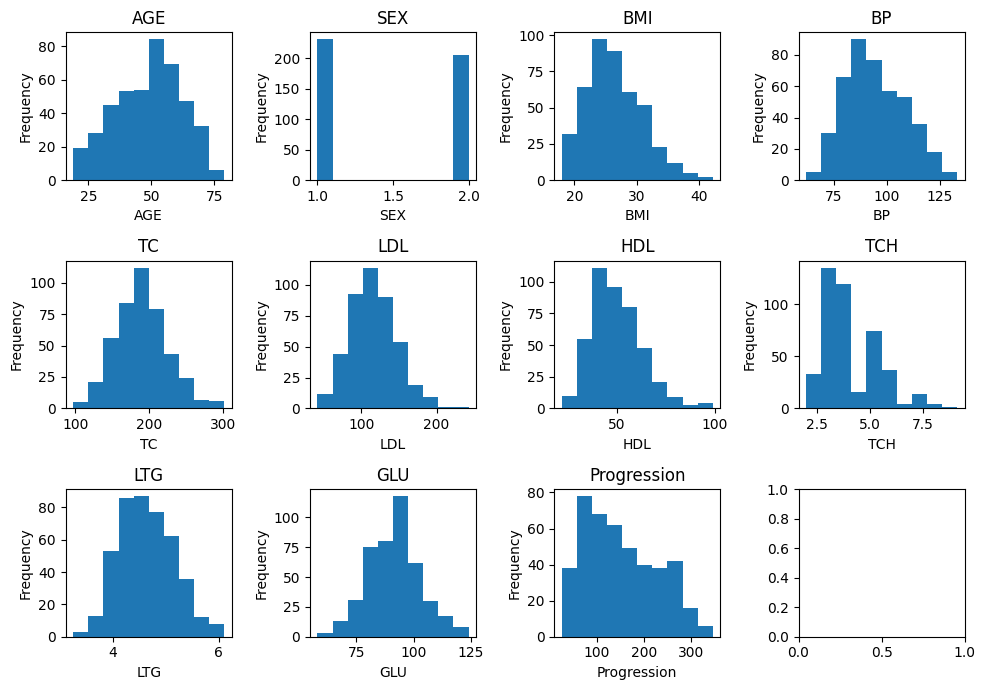

In [ ]:
# Set up the figure and axes
row=3
col=4

setC=[list(dDB0.columns)[0:4], list(dDB0.columns)[4:8], list(dDB0.columns)[8:11]]

fig, axes = plt.subplots(row,col, figsize=(10, 7))  # Adjust the figure size as needed

# Loop through the columns and create histograms
for i in range(row):
  for j in range (col):
      if (i==2) and (j==3):
        pass
      else:

        ax=axes[i][j]
        
        # Create histogram 
        ax.hist(dDB0[setC[i][j]])
        
        # Set title and labels for the current axis
        ax.set_title(setC[i][j])
        ax.set_xlabel(setC[i][j])
        ax.set_ylabel('Frequency')
      
# Adjust layout and display the plot
plt.tight_layout()
plt.show()


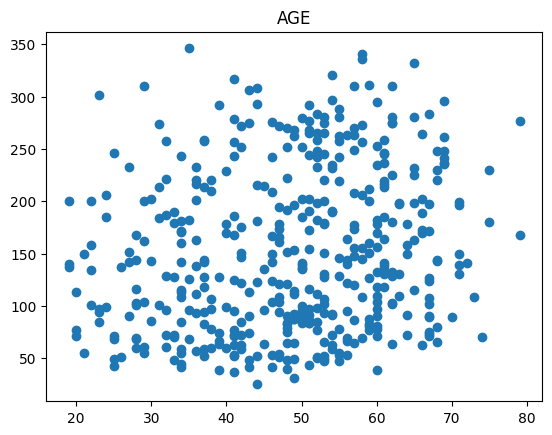

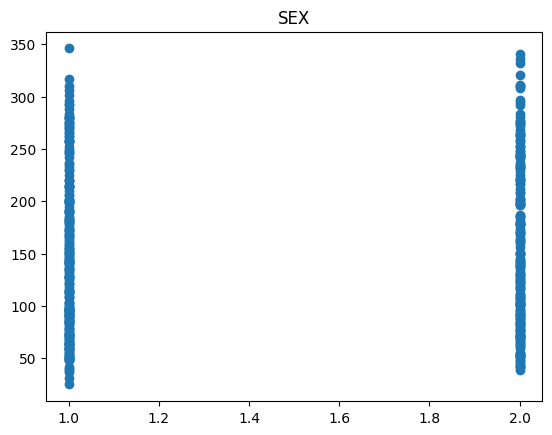

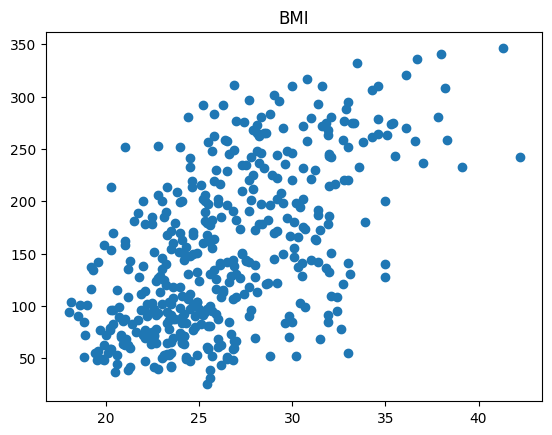

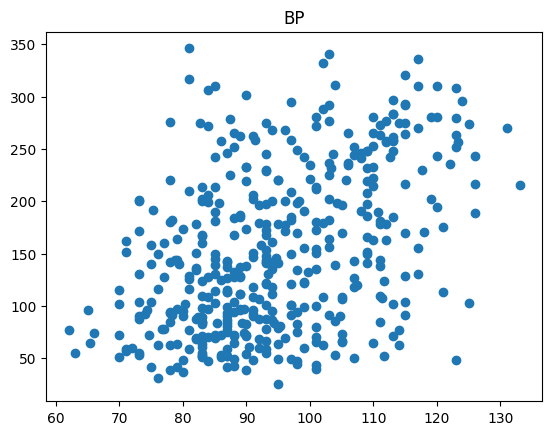

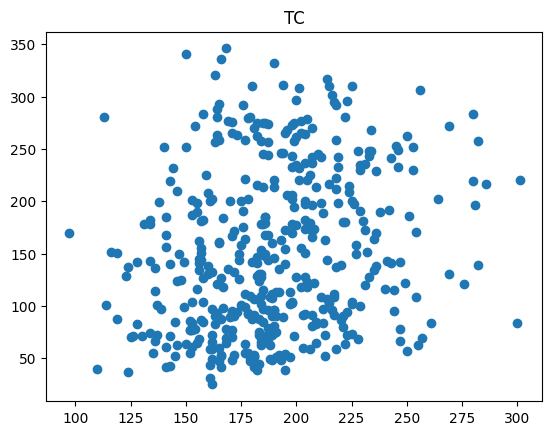

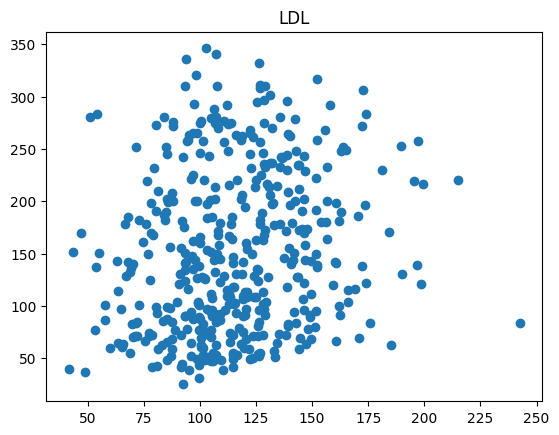

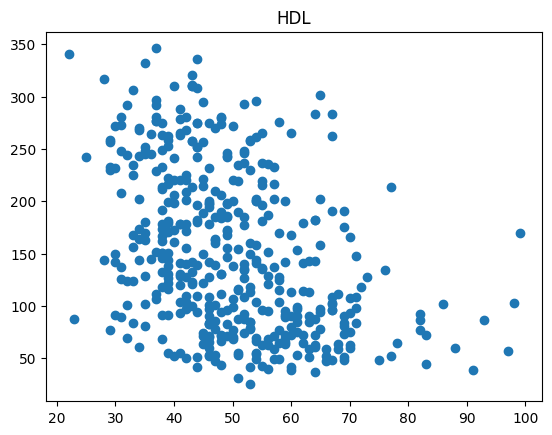

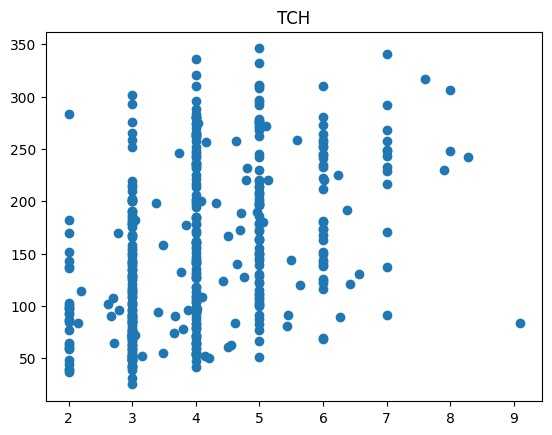

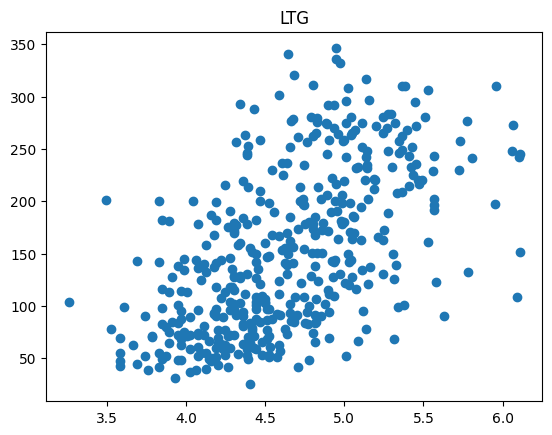

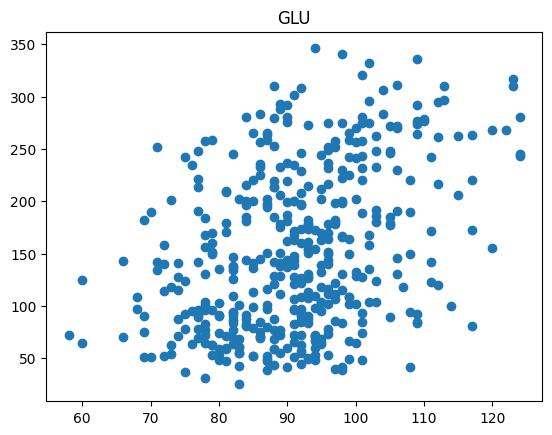

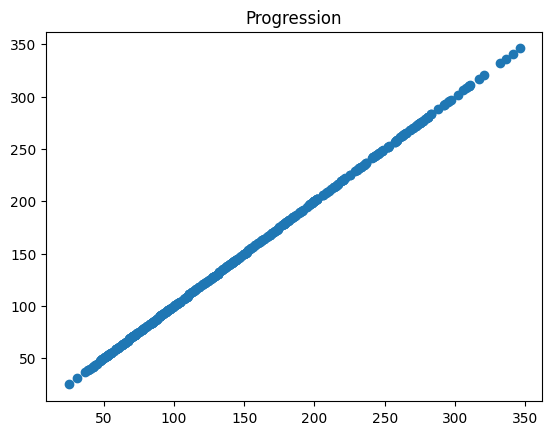

In [ ]:
Progression = dDB0[list(dDB0.columns)[10]]

for i in range(11):
  x=dDB0[list(dDB0.columns)[i]]
  plt.scatter(x, Progression)
  plt.title(list(dDB0.columns)[i])
  plt.show()

# Regresion Lineal Multiple


In [ ]:


import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import linear_model

linear_regression = smf.ols(formula = 'Progression ~ AGE + SEX + BMI + BP + TC + LDL + HDL + TCH + LTG + GLU',
                            data=dDB0)

fitted_model = linear_regression.fit()

fitted_model.summary()






<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Progression   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     45.70
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           2.49e-61
Time:                        03:56:52   Log-Likelihood:                -2358.0
No. Observations:                 437   AIC:                             4738.
Df Residuals:                     426   BIC:                             4783.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -341.7232     67.522     -5.061      0.000    -474.440    -209.006
AGE           -0.0613      0.218     -0.281      0.779      -0.489       0.367
SEX          -21.5476      5.867     -3.673      0.000     -33.079     -10.017
BMI            5.5832      0.719      7.768      0.000       4.170       6.996
BP             1.1106      0.225      4.928      0.000       0.668       1.554
TC            -1.1477      0.573     -2.002      0.046      -2.275      -0.021
LDL            0.7873      0.531      1.483      0.139      -0.256       1.831
HDL            0.4538      0.782      0.580      0.562      -1.084       1.992
TCH            6.8509      5.957      1.150      0.251      -4.858      18.560
LTG           70.1199     15.671      4.474      0.000      39.317     100.923
GLU            0.2881      0.273      1.056      0.292      -0.248       0.825
==============================================================================
Omnibus:                        1.495   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                1.414
Skew:                           0.035   Prob(JB):                        0.493
Kurtosis:                       2.730   Cond. No.                     7.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

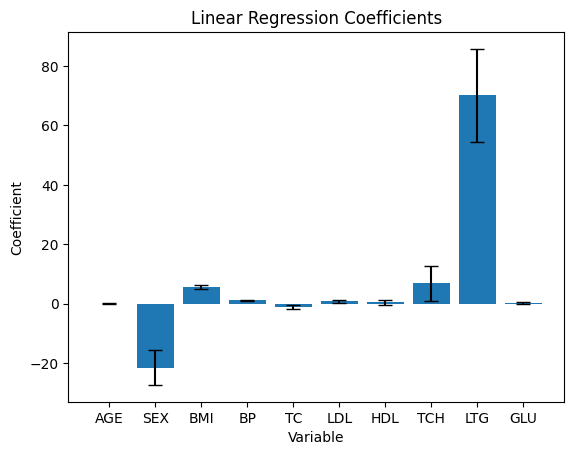

In [ ]:
coef = fitted_model.params[1:]
std_err = fitted_model.bse[1:]

# Create the plot
fig, ax = plt.subplots()
ax.bar(x=coef.index, height=coef.values, yerr=std_err.values, capsize=5)
ax.set_xlabel('Variable')
ax.set_ylabel('Coefficient')
ax.set_title('Linear Regression Coefficients')
plt.show()

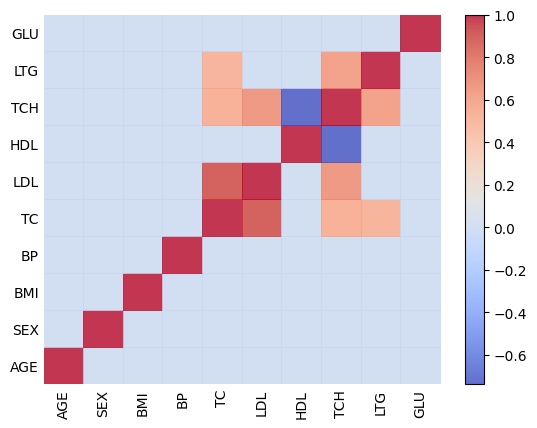

In [ ]:
# matriz de correlacion entre variables predictoras

def visualize_correlation_matrix(data, hurdle=0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tick_params(axis='both', which='both', length=0)
    heatmap.axes.set_xticklabels(variables, minor=False)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.colorbar()
    plt.show()

variables = dDB0.loc[:, ~dDB0.columns.isin(['Progression'])].columns.tolist()

visualize_correlation_matrix(dDB0.loc[:, ~dDB0.columns.isin(['Progression'])], hurdle=0.5)
